In [58]:
import pandas as pd

df = pd.read_excel('/Users/gilbenor/Documents/code projects/msc/counting_research_algorithms/fifty_one/processed_data/combined_carapace_length_data.xlsx')


# %% cell 2 code

# Remove duplicates based on all columns
df_no_duplicates = df.drop_duplicates(subset=['meas_image_name'])

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing duplicates: {len(df_no_duplicates)}")
print(f"Number of duplicate rows removed: {len(df) - len(df_no_duplicates)}")

# Update df to deduped version
df = df_no_duplicates

df[[ 'length_Length_ground_truth_annotation(mm)','length_Length_fov(mm)','meas_scaled_meas_1','meas_scaled_meas_2','meas_scaled_meas_3','meas_scaled_avg','length_Length_1','length_Length_2','length_Length_3']]

#median of the ,'meas_scaled_meas_1','meas_scaled_meas_2','meas_scaled_meas_3','length_Length_1','length_Length_2','length_Length_3' 
  
df['media_all']=df[['meas_scaled_meas_1','meas_scaled_meas_2','meas_scaled_meas_3','length_Length_1','length_Length_2','length_Length_3']].median(axis=1)  

cols = ['meas_scaled_meas_1','meas_scaled_meas_2','meas_scaled_meas_3','length_Length_1','length_Length_2','length_Length_3']
df['MAD_all'] = df[cols].apply(lambda row: (row - row.median()).abs().median(), axis=1)






#dropna in ength_Length_fov(mm)

df = df[df['length_Length_fov(mm)'].notna()]

df[['length_Length_ground_truth_annotation(mm)','length_Length_fov(mm)', 'media_all','MAD_all']]


# within_mad_bounds = ((df['length_Length_fov(mm)'] <= df['media_all'] + df['MAD_all']) & 
#                      (df['length_Length_fov(mm)'] >= df['media_all'] - df['MAD_all']))

# outside_mad_bounds = ~within_mad_bounds

# # Calculate distance from bounds
# upper_bound_distance = df['length_Length_fov(mm)'] - (df['media_all'] + df['MAD_all'])
# lower_bound_distance = (df['media_all'] - df['MAD_all']) - df['length_Length_fov(mm)']

# Remove points that are more than 15mm outside the bounds
# df = df[~((upper_bound_distance > 15) | (lower_bound_distance > 15))]


Original number of rows: 22
Number of rows after removing duplicates: 22
Number of duplicate rows removed: 0


,length_Length_ground_truth_annotation(mm),length_Length_fov(mm),media_all,MAD_all
0,41.949385,32.205067,33.150708,0.334054
1,30.844278,36.387421,41.750684,1.926203
2,31.596174,30.787714,36.494500,0.249074
3,45.611089,41.482553,46.122649,2.210584
4,34.392638,31.827117,39.511120,0.487089
5,21.513064,24.836446,40.833344,0.971078
6,25.710683,27.782042,34.044395,1.184811
7,30.123459,23.913502,38.242797,1.719056
8,29.373020,29.206025,33.053917,0.435195
9,30.891440,23.285914,30.376900,2.756916


In [47]:
df

,meas_image_name,meas_prawn_id,meas_meas_1,meas_meas_2,meas_meas_3,meas_avg,meas_std,meas_dev_pct,meas_flag,meas_base_image_name,...,length_Error_distance_mm_ground_min,length_Error_distance_mm_ground_max,length_Error_distance_mm_ground_median,length_Error_percentage_distance_mm_ground_min,length_Error_percentage_distance_mm_ground_max,length_Error_percentage_distance_mm_ground_median,length_pose_eval_iou,match_type,media_all,MAD_all
1,undistorted_GX010080_157_2283.jpg_gamma_obj2_c...,1.jpg,752.0007,767.4907,752.4307,759.7457,1.0,OK,NaN,undistorted_GX010080_157_2283.jpg_gamma,...,25.062749,20.412749,24.002749,24.001177,18.714759,22.755088,0.997980,spatial_match,120.028096,12.341566
5,undistorted_GX010094_24_430.jpg_gamma_obj3_cro...,1.jpg,538.6771,547.9352,553.9251,543.3061,2.0,OK,NaN,undistorted_GX010094_24_430.jpg_gamma,...,20.386174,13.838174,14.218174,18.195117,11.668921,12.027894,0.995745,camera_frame_match,104.891282,9.024441
6,undistorted_GX010094_24_430.jpg_gamma_obj4_cro...,1.jpg,491.7977,486.5758,491.1018,489.1868,0.4,OK,NaN,undistorted_GX010094_24_430.jpg_gamma,...,20.386174,13.838174,14.218174,18.195117,11.668921,12.027894,0.995745,camera_frame_match,99.410065,13.154035
7,undistorted_GX010094_24_430.jpg_gamma_obj2_cro...,1.jpg,555.3602,551.1307,538.0595,553.2454,2.7,OK,NaN,undistorted_GX010094_24_430.jpg_gamma,...,20.386174,13.838174,14.218174,18.195117,11.668921,12.027894,0.995745,camera_frame_match,105.017894,8.923617
8,undistorted_GX010094_24_430.jpg_gamma_obj1_cro...,1.jpg,571.0079,576.7538,581.1730,573.8809,1.3,OK,NaN,undistorted_GX010094_24_430.jpg_gamma,...,20.386174,13.838174,14.218174,18.195117,11.668921,12.027894,0.995745,camera_frame_match,107.295240,6.033466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,undistorted_GX010068_26_666.jpg_gamma_obj1_cro...,1.jpg,697.6855,699.4119,705.5105,698.5487,1.0,OK,NaN,undistorted_GX010068_26_666.jpg_gamma,...,0.229529,5.298529,0.849529,0.171037,3.804583,0.630130,0.996942,gx_prefix_match,134.360941,0.728487
127,undistorted_GX010073_55_1014.jpg_gamma_obj1_cr...,1.jpg,669.0269,657.1096,651.0069,663.0682,1.8,OK,NaN,undistorted_GX010073_55_1014.jpg_gamma,...,14.269386,14.778614,11.389386,10.661765,9.073035,8.330629,0.995328,gx_prefix_match,125.051279,11.261234
128,undistorted_GX010082_236_3137.jpg_gamma_obj1_c...,1.jpg,795.4634,810.0827,794.6100,802.7730,1.0,OK,NaN,undistorted_GX010082_236_3137.jpg_gamma,...,19.670784,13.194784,16.809784,17.301058,10.979824,14.421819,0.928385,gx_prefix_match,136.483962,17.880628
129,undistorted_GX010088_262_3712.jpg_gamma_obj1_c...,1.jpg,692.3121,701.0000,714.2332,696.6560,2.5,OK,NaN,undistorted_GX010088_262_3712.jpg_gamma,...,27.902307,2.097693,10.614307,28.451129,1.637914,9.201109,0.961784,gx_prefix_match,131.655990,6.574676


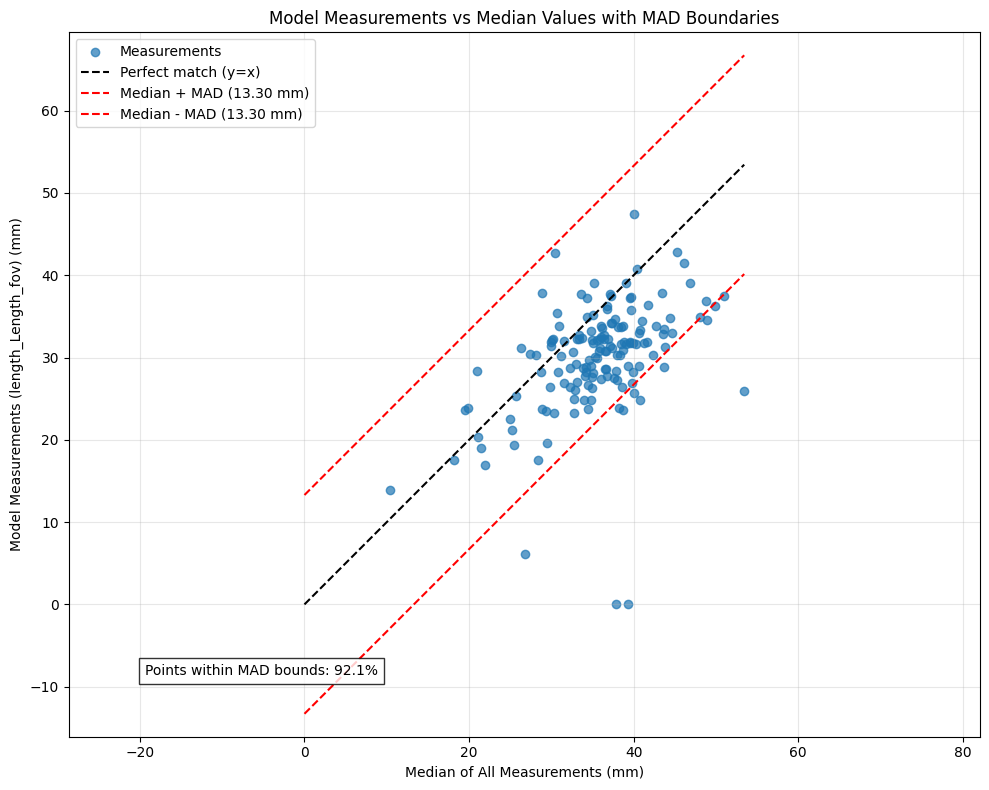

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.figure(figsize=(10, 8))

# Plot scatter points
plt.scatter(df['media_all'], df['length_Length_fov(mm)'], alpha=0.7, label='Measurements')

# Get min and max for diagonal lines
min_val = min(df['media_all'].min(), df['length_Length_fov(mm)'].min())
max_val = max(df['media_all'].max(), df['length_Length_fov(mm)'].max())
x = np.linspace(min_val, max_val, 100)

# Calculate median MAD value
median_mad = df['MAD_all'].max()

# Plot diagonal lines
plt.plot(x, x, 'k--', label='Perfect match (y=x)')  # Center diagonal
plt.plot(x, x + median_mad, 'r--', label=f'Median + MAD ({median_mad:.2f} mm)')  # Upper bound
plt.plot(x, x - median_mad, 'r--', label=f'Median - MAD ({median_mad:.2f} mm)')  # Lower bound

plt.xlabel('Median of All Measurements (mm)')
plt.ylabel('Model Measurements (length_Length_fov) (mm)')
plt.title('Model Measurements vs Median Values with MAD Boundaries')
plt.legend()
plt.grid(True, alpha=0.3)

# Calculate percentage of points within MAD bounds
within_bounds = ((df['length_Length_fov(mm)'] <= df['media_all'] + median_mad) & 
                 (df['length_Length_fov(mm)'] >= df['media_all'] - median_mad)).mean() * 100
plt.figtext(0.15, 0.15, f"Points within MAD bounds: {within_bounds:.1f}%", 
            bbox=dict(facecolor='white', alpha=0.8))

# Make plot square and equal aspect ratio
plt.axis('equal')
plt.tight_layout()

plt.show()


In [56]:
# Identify points within and outside MAD bounds



within_mad_bounds = ((df['length_Length_fov(mm)'] <= df['media_all'] + df['MAD_all']) & 
                     (df['length_Length_fov(mm)'] >= df['media_all'] - df['MAD_all']))

outside_mad_bounds = ~within_mad_bounds

# Get dataframes for points inside and outside MAD bounds
df_within = df[within_mad_bounds]
df_outside = df[outside_mad_bounds]

# 1. Basic counts and percentages
total_count = len(df)
within_count = len(df_within)
outside_count = len(df_outside)

print(f"Points within MAD bounds: {within_count} out of {total_count} ({within_count/total_count*100:.1f}%)")
print(f"Points outside MAD bounds: {outside_count} out of {total_count} ({outside_count/total_count*100:.1f}%)")

# 2. For points OUTSIDE MAD bounds, calculate error statistics
if outside_count > 0:
    # Calculate absolute errors for points outside MAD bounds
    outside_abs_errors = (df_outside['length_Length_fov(mm)'] - df_outside['media_all']).abs()
    
    # Calculate error statistics for points outside MAD bounds
    outside_mean_error = outside_abs_errors.mean()
    outside_median_error = outside_abs_errors.median()
    outside_max_error = outside_abs_errors.max()
    
    # Calculate percentage errors relative to median value
    outside_percent_errors = (outside_abs_errors / df_outside['media_all']) * 100
    outside_mean_percent_error = outside_percent_errors.mean()
    outside_median_percent_error = outside_percent_errors.median()
    
    print("\nError Statistics for Points OUTSIDE MAD Bounds:")
    print(f"Mean Absolute Error: {outside_mean_error:.2f} mm")
    print(f"Median Absolute Error: {outside_median_error:.2f} mm")
    print(f"Maximum Absolute Error: {outside_max_error:.2f} mm")
    
    print("\nPercentage Error Statistics for Points OUTSIDE MAD Bounds:")
    print(f"Mean Percentage Error: {outside_mean_percent_error:.2f}%")
    print(f"Median Percentage Error: {outside_median_percent_error:.2f}%")
    
    # 3. Calculate by how much these points exceed their MAD bounds
    # How far beyond the MAD boundary each point is
    distance_beyond_mad = outside_abs_errors - df_outside['MAD_all']
    mean_distance_beyond = distance_beyond_mad.mean()
    median_distance_beyond = distance_beyond_mad.median()
    
    print("\nDistance Beyond MAD Bounds:")
    print(f"Mean distance beyond MAD: {mean_distance_beyond:.2f} mm")
    print(f"Median distance beyond MAD: {median_distance_beyond:.2f} mm")
    
    # As percentage of MAD
    percent_beyond_mad = (distance_beyond_mad / df_outside['media_all'])*100
    mean_percent_beyond = percent_beyond_mad.mean()
    
    print(f"Mean percentage beyond MAD: {mean_percent_beyond:.2f}%")
else:
    print("\nNo points outside MAD bounds")


Points within MAD bounds: 31 out of 152 (20.4%)
Points outside MAD bounds: 121 out of 152 (79.6%)

Error Statistics for Points OUTSIDE MAD Bounds:
Mean Absolute Error: 7.66 mm
Median Absolute Error: 6.93 mm
Maximum Absolute Error: 39.32 mm

Percentage Error Statistics for Points OUTSIDE MAD Bounds:
Mean Percentage Error: 20.82%
Median Percentage Error: 18.90%

Distance Beyond MAD Bounds:
Mean distance beyond MAD: 5.72 mm
Median distance beyond MAD: 4.33 mm
Mean percentage beyond MAD: 15.31%
